# Situación de casos de Covid-19 en Madrid por Zonas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import io
import requests

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Carga de Datos de la fuente oficial de la Comunidad de Madrid

Datos Aqui:

In [3]:
#url="https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv"
#df = pd.read_csv(url, sep=';', encoding='latin-1')
df = pd.read_csv('datasets/covid19_tia_muni_y_distritos.csv', sep=';', encoding='latin-1')

In [4]:
# fixing data
df['municipio_distrito_clean']=df['municipio_distrito'].apply(lambda x: x.strip())
df['tasa_incidencia_acumulada_total_float']=df['tasa_incidencia_acumulada_total'].str.replace(',','.').astype(float)
df.drop(labels=['municipio_distrito','tasa_incidencia_acumulada_total'],axis=1, inplace=True)

## Funciones para visualización de datos 

### Comparativa de ocurrencia entre zonas 

In [5]:
def comparePlaces(df, places):
    maxDate = df['fecha_informe'].unique().max()
    df_filtered = df[(df['fecha_informe']==maxDate) & df['municipio_distrito_clean'].isin(places)]
    
    # Casos confirmados totales
    plt.figure(figsize=(20,7))
    plt.title('Casos Totales')
    df_filtered_order_1 = df_filtered.sort_values(by='casos_confirmados_totales', ascending=0)
    sns.barplot(data=df_filtered_order_1, x='municipio_distrito_clean', y='casos_confirmados_totales')
    plt.xlabel('Municipio - Distrito')
    plt.xticks(rotation=90)
    
    # incidencia de confirmados totales
    plt.figure(figsize=(20,7))
    plt.title('Casos Relativos a la población de la zona')
    df_filtered_order_2 = df_filtered.sort_values(by='tasa_incidencia_acumulada_total_float', ascending=0)
    sns.barplot(data=df_filtered_order_2, x='municipio_distrito_clean', y='tasa_incidencia_acumulada_total_float')
    plt.xlabel('Municipio - Distrito')
    plt.ylabel('Casos/100000 hab.')
    plt.xticks(rotation=90)    

### Evolución de casos totales por zona 

In [6]:
def plotPlaces(df, places):
    N = places.size
    plt.figure(figsize=(20,7*N))
    index=1
    for p in places:
        try:
            df_place = df[df['municipio_distrito_clean']==p]
            df_place_sorted = df_place.sort_values(by=['fecha_informe'], ascending=1)
            x=df_place_sorted['fecha_informe']
            y=df_place_sorted['casos_confirmados_totales']            
            plt.subplot(N,2,index)
            # Total Acumulado
            plt.title(p + ' (Total Acumulado)')
            plt.ylim([(0.98)*min(y),(1.02)*max(y)])
            plt.plot(x,y,'r*-')
            plt.xticks(rotation=15) 
            #Incrementos por día
            plt.subplot(N,2,index+1)
            plt.title(p + ' (Incremento por día)')
            plt.bar(x[1:],np.array(y[1:])-np.array(y[:-1]), width=0.2)
            plt.xticks(rotation=15)
            index+=2
        except:
            print('Error en ' + p + '!!')

## Listas de municipios que nos interesa observar

Todos los distritos de Madrid y algunos municipios de interés, los mas grandes de la comunidad.

In [7]:
madrid_places = df[df['municipio_distrito_clean'].str.startswith('Madrid')]['municipio_distrito_clean'].unique()
loc_places = np.array(['Getafe','Leganés','Fuenlabrada','Alcorcón','Móstoles','Parla','Alcalá de Henares','Torrejón de Ardoz'])
places = np.concatenate([madrid_places, loc_places])

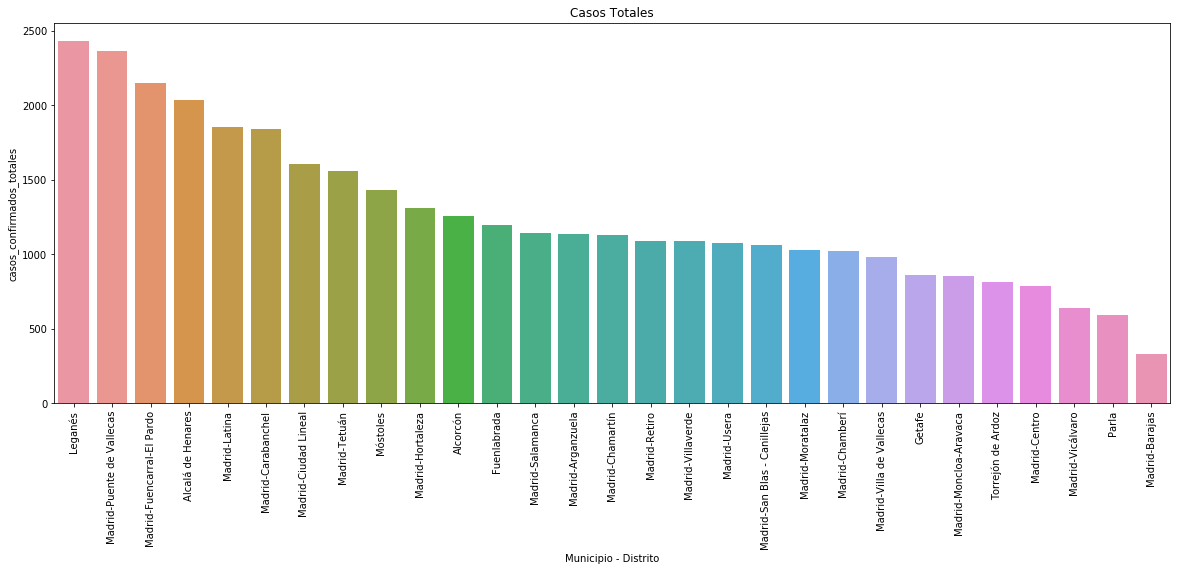

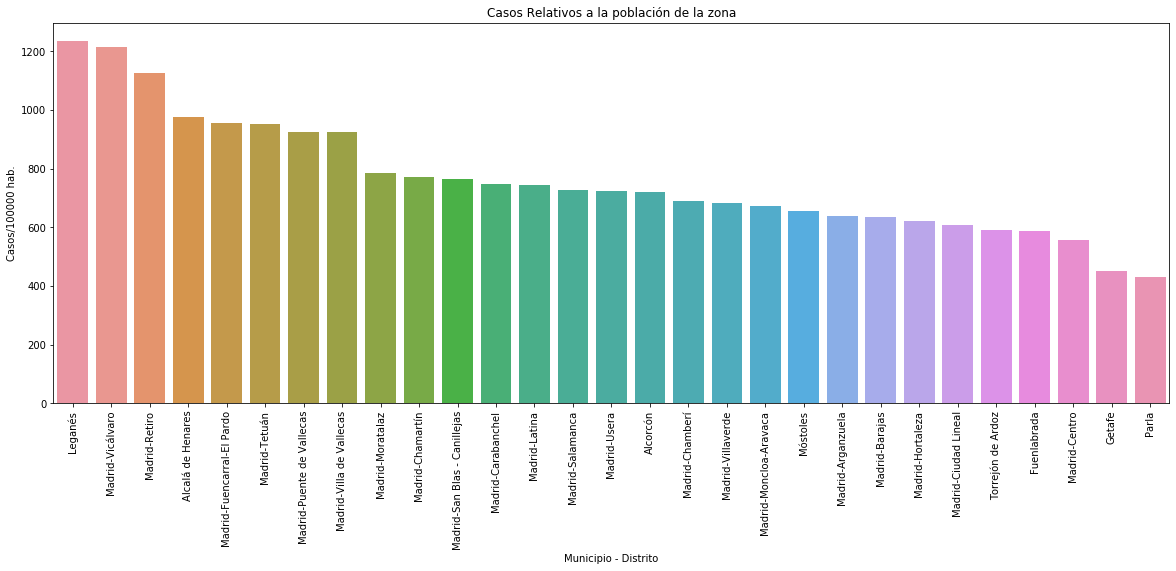

In [8]:
comparePlaces(df,places)

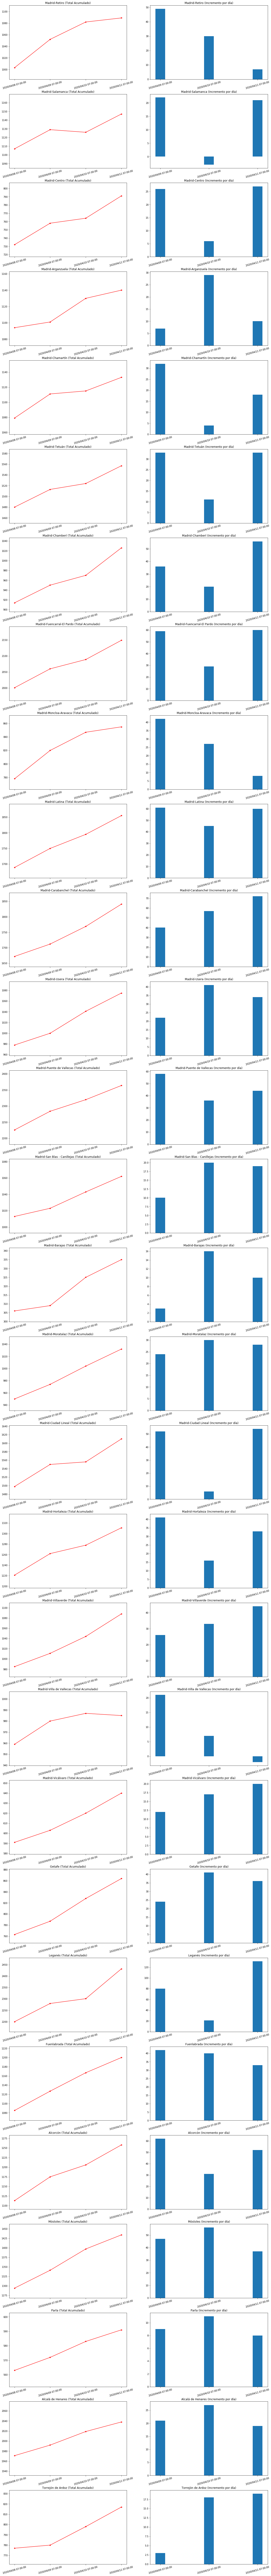

In [9]:
plotPlaces(df,places)

##  Conclusiones

Casi todas las curvas tiene tendencia a la recta, lo que indica situación de pico de contagios. Existen algunos casos con otras tendencias:

* Tendencia creciente (No han llegado al pico de contagios): Vicalvaro, Villaverde, Carabanchel
* Tendencia Decreciente (Ya han sobrepasado el pico de contagios): Retiro, Aravaca, Vallecas